# 1. Import Data & Explore Data

In [1]:
import pandas as pd
import numpy as np

aisels = pd.read_csv('/content/aisles.csv')
dept = pd.read_csv('/content/departments.csv')
order_prior = pd.read_csv('/content/order_products__prior.csv')
order_train = pd.read_csv('/content/order_products__train.csv')
orders = pd.read_csv('/content/orders.csv')
products = pd.read_csv('/content/products.csv')

### 1.1 Explore aisels.csv

In [2]:
aisels.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
print("Total asile count:", len(aisels))

Total asile count: 134


### 1.2 Explore departments.csv

In [4]:
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
print("Total department count:", len(dept))

Total department count: 21


### 1.3 Explore products.csv

In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
print("Total unique product count:", products.product_id.nunique())

Total unique product count: 49688


### 1.4 Explore orders.csv

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
# Explore data inside orders.csv
print("Total numbers of orders:", len(orders))
print("\nTotal numbers of unique user_id:", orders.user_id.nunique())
print("\nNumber of orders in each eval_set:")
orders.eval_set.value_counts()

Total numbers of orders: 3421083

Total numbers of unique user_id: 206209

Number of orders in each eval_set:


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

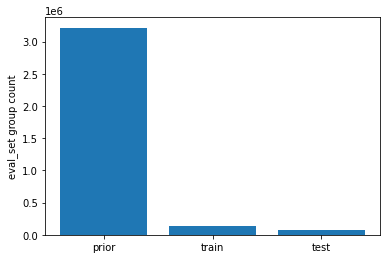

In [10]:
import matplotlib.pyplot as plt
names = ['prior', 'train', 'test']
plt.bar(names, orders.eval_set.value_counts())
plt.ylabel('eval_set group count')
plt.show()

### 1.5 Explore order_prior.csv

In [11]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [12]:
len(order_prior)

32434489

### 1.6 Explore order_train.csv

In [13]:
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [14]:
len(order_train)

1384617

# 2. Problem Statements

- I want to predict which product(s) a customer will purchase in this customer's the next order.

- In *order_prior.csv*, **reordered** column indicates that if a customer purchase a product again. Therefore, my main focus is to predict values inside **reordered** column

- I need to merge these tables

    1. **Products**: (aisles)--(department)
    2. **orders_products**: (order_prior)--(orders)

# 3. Data Pre-processsing

### 3.1 products

In [15]:
# Add information to products
products = pd.merge(products, aisels, on='aisle_id', how='left')
products = pd.merge(products, dept, on='department_id', how='left')
products

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


### 3.2

In [16]:
# Add user_id to each order in order_train
order_train = pd.merge(order_train, orders[['order_id', 'user_id']], on='order_id', how='left')
order_train

,order_id,product_id,add_to_cart_order,reordered,user_id
0,1,49302,1,1,112108
1,1,11109,2,1,112108
2,1,10246,3,0,112108
3,1,49683,4,0,112108
4,1,43633,5,1,112108
...,...,...,...,...,...
1384612,3421063,14233,3,1,169679
1384613,3421063,35548,4,1,169679
1384614,3421070,35951,1,1,139822
1384615,3421070,16953,2,1,139822


### 3.3

In [17]:
# Add "product_id", "add_to_cart_order", "reordered" columns from order_prior to each order
orders_products = pd.merge(orders, order_prior, on='order_id', how='inner')
orders_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


### 3.4

### 3.5 Users

In [18]:
# Users
prior = orders[orders['eval_set'] == 'prior']
gb_id = prior.groupby('user_id')
# Total numbers of order from each user
users = pd.DataFrame(gb_id.size(), columns=['placed_orders_sum'])
users.head()

,placed_orders_sum
user_id,
1,10
2,14
3,12
4,5
5,4


In [19]:
# Average days since last purchase for each user
users['mean_days_since_prior_order'] = gb_id['days_since_prior_order'].agg('mean')
users.reset_index(inplace=True)

In [20]:
users.head()

,user_id,placed_orders_sum,mean_days_since_prior_order
0,1,10,19.555556
1,2,14,15.230769
2,3,12,12.090909
3,4,5,13.750000
4,5,4,13.333333


In [21]:
gb_id = orders_products.groupby('user_id')
# Count of total number of times user made a purchase
df = pd.DataFrame(gb_id.size(), columns=['prod_purchased_tot_count'])

sum_tot_order_number = gb_id['order_number'].agg(lambda x: sum(x>1))
sum_reorder = gb_id['reordered'].agg('sum')
df['reorder_ratio'] = sum_reorder/sum_tot_order_number

In [22]:
df

,prod_purchased_tot_count,reorder_ratio
user_id,,
1,59,0.759259
2,195,0.510989
3,88,0.705128
4,18,0.071429
5,37,0.538462
...,...,...
206205,32,0.533333
206206,285,0.480427
206207,223,0.658291


In [23]:
users = pd.merge(users, df, on='user_id', how='inner')

In [24]:
users

,user_id,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio
0,1,10,19.555556,59,0.759259
1,2,14,15.230769,195,0.510989
2,3,12,12.090909,88,0.705128
3,4,5,13.750000,18,0.071429
4,5,4,13.333333,37,0.538462
...,...,...,...,...,...
206204,206205,3,20.000000,32,0.533333
206205,206206,67,3.772727,285,0.480427
206206,206207,16,14.333333,223,0.658291
206207,206208,49,7.437500,677,0.720301


In [25]:
df = orders.loc[orders['eval_set'] != 'prior', ['user_id', 'order_id', 'eval_set', 'days_since_prior_order']]
users = pd.merge(users, df, on='user_id', how='inner')

In [26]:
users

,user_id,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,order_id,eval_set,days_since_prior_order
0,1,10,19.555556,59,0.759259,1187899,train,14.0
1,2,14,15.230769,195,0.510989,1492625,train,30.0
2,3,12,12.090909,88,0.705128,2774568,test,11.0
3,4,5,13.750000,18,0.071429,329954,test,30.0
4,5,4,13.333333,37,0.538462,2196797,train,6.0
...,...,...,...,...,...,...,...,...
206204,206205,3,20.000000,32,0.533333,1716008,train,10.0
206205,206206,67,3.772727,285,0.480427,1043943,test,0.0
206206,206207,16,14.333333,223,0.658291,2821651,test,14.0
206207,206208,49,7.437500,677,0.720301,803273,test,4.0


### 3.6 Analyze (each user)--(each product)

In [27]:
gb_id = orders_products.groupby(['user_id', 'product_id'])
each = pd.DataFrame(gb_id.size(), columns=['prod_purchased_count'])
each.reset_index(inplace=True)

In [28]:
each.head()

,user_id,product_id,prod_purchased_count
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [29]:
each = pd.merge(each, users, on='user_id', how='inner')

In [30]:
each.head()

,user_id,product_id,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,order_id,eval_set,days_since_prior_order
0,1,196,10,10,19.555556,59,0.759259,1187899,train,14.0
1,1,10258,9,10,19.555556,59,0.759259,1187899,train,14.0
2,1,10326,1,10,19.555556,59,0.759259,1187899,train,14.0
3,1,12427,10,10,19.555556,59,0.759259,1187899,train,14.0
4,1,13032,3,10,19.555556,59,0.759259,1187899,train,14.0


In [31]:
each = pd.merge(each, order_train[['user_id', 'product_id', 'reordered']], on=['user_id', 'product_id'], how='left')

In [32]:
each.head()

,user_id,product_id,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,order_id,eval_set,days_since_prior_order,reordered
0,1,196,10,10,19.555556,59,0.759259,1187899,train,14.0,1.0
1,1,10258,9,10,19.555556,59,0.759259,1187899,train,14.0,1.0
2,1,10326,1,10,19.555556,59,0.759259,1187899,train,14.0,NaN
3,1,12427,10,10,19.555556,59,0.759259,1187899,train,14.0,NaN
4,1,13032,3,10,19.555556,59,0.759259,1187899,train,14.0,1.0


# 4. Train and Test

In [33]:
train = each[each['eval_set']=='train']
train = train.drop(['eval_set', 'user_id', 'product_id', 'order_id'], axis=1)

In [34]:
train['reordered'] = train['reordered'].fillna(0)

In [35]:
train.head()

,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,days_since_prior_order,reordered
0,10,10,19.555556,59,0.759259,14.0,1.0
1,9,10,19.555556,59,0.759259,14.0,1.0
2,1,10,19.555556,59,0.759259,14.0,0.0
3,10,10,19.555556,59,0.759259,14.0,0.0
4,3,10,19.555556,59,0.759259,14.0,1.0


In [60]:
len(train)

8474661

In [36]:
from sklearn.model_selection import train_test_split

subtrain = train.sample(frac=0.1, random_state=2)
subtrain.head()
X_train, X_test, y_train, y_test = train_test_split(subtrain, subtrain.reordered, test_size=0.30, random_state=0)

In [37]:
X_test = X_test.drop(['reordered'], axis=1)
X_test.head()

,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,days_since_prior_order
6857932,2,22,12.142857,127,0.479339,24.0
5543187,1,9,24.250000,111,0.184466,2.0
13060830,1,67,5.378788,762,0.686508,2.0
5540739,1,6,24.800000,57,0.187500,30.0
4913900,1,5,13.500000,24,0.142857,4.0


In [38]:
test = each[each['eval_set']=='test']
test = test.drop(['eval_set', 'user_id', 'reordered'], axis=1)
test.head()

,product_id,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,order_id,days_since_prior_order
120,248,1,12,12.090909,88,0.705128,2774568,11.0
121,1005,1,12,12.090909,88,0.705128,2774568,11.0
122,1819,3,12,12.090909,88,0.705128,2774568,11.0
123,7503,1,12,12.090909,88,0.705128,2774568,11.0
124,8021,1,12,12.090909,88,0.705128,2774568,11.0


# 5. Modeling

In [39]:
import xgboost as xgb
params = {
    'learning_rate': 0.1,
    'max_depth': 6,
    'subsample': 0.70,
    'n_estimators': [10, 50, 150, 200]
}

In [40]:
X_tr = xgb.DMatrix(X_train.drop(['reordered'], axis=1), label=X_train['reordered'])

In [41]:
model = xgb.train(params, X_tr, num_boost_round=100)

In [42]:
X_te = xgb.DMatrix(X_test)

In [43]:
X_test['reordered'] = model.predict(X_te)

In [44]:
X_test.head()

,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,days_since_prior_order,reordered
6857932,2,22,12.142857,127,0.479339,24.0,0.056068
5543187,1,9,24.250000,111,0.184466,2.0,0.026852
13060830,1,67,5.378788,762,0.686508,2.0,0.008975
5540739,1,6,24.800000,57,0.187500,30.0,0.053558
4913900,1,5,13.500000,24,0.142857,4.0,0.055958


In [45]:
X_test.loc[X_test['reordered'] > 0.21, 'reordered'] = 1

In [46]:
X_test.loc[X_test['reordered'] <= 0.21, 'reordered'] = 0

In [47]:
X_test.head()

,prod_purchased_count,placed_orders_sum,mean_days_since_prior_order,prod_purchased_tot_count,reorder_ratio,days_since_prior_order,reordered
6857932,2,22,12.142857,127,0.479339,24.0,0.0
5543187,1,9,24.250000,111,0.184466,2.0,0.0
13060830,1,67,5.378788,762,0.686508,2.0,0.0
5540739,1,6,24.800000,57,0.187500,30.0,0.0
4913900,1,5,13.500000,24,0.142857,4.0,0.0


In [48]:
len(X_test)

254240

In [49]:
y_test.head()

6857932     0.0
5543187     0.0
13060830    0.0
5540739     0.0
4913900     0.0
Name: reordered, dtype: float64

In [50]:
len(y_test)

254240

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, X_test.reordered))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    229461
         1.0       0.36      0.42      0.39     24779

    accuracy                           0.87    254240
   macro avg       0.65      0.67      0.66    254240
weighted avg       0.88      0.87      0.88    254240



In [52]:
# Apply model to the real test set
real_test = xgb.DMatrix(test.drop(['order_id', 'product_id'], axis=1))
test['reordered'] = model.predict(real_test)
test.loc[test['reordered'] > 0.21, 'reordered'] = 1

In [53]:
# Create submission
submission = test[test['reordered']==1]
submission = submission.groupby('order_id')['product_id'].agg(lambda l: ' '.join([str(i) for i in l]))
submission = submission.to_frame('products').reset_index()

In [54]:
# fill missing order_id
missing_orders = pd.DataFrame(set(test.order_id) - set(submission.order_id), columns=['order_id'])
missing_orders['products'] = 'None'
submission = submission.append(missing_orders)
submission = submission.sort_values('order_id')
submission.columns = ['order_id', 'products']

In [55]:
submission.head()

,order_id,products
0,17,13107
1,34,39180 39475 43504 47029 47766 47792
2,137,23794 24852 38689 41787
3,182,2078 3397 5479 9337 13629 21903 24009 27104 30...
4,257,24852 27104 27966 29837 45013 49235


In [57]:
submission.to_csv('/content/submossion.csv', index=False)